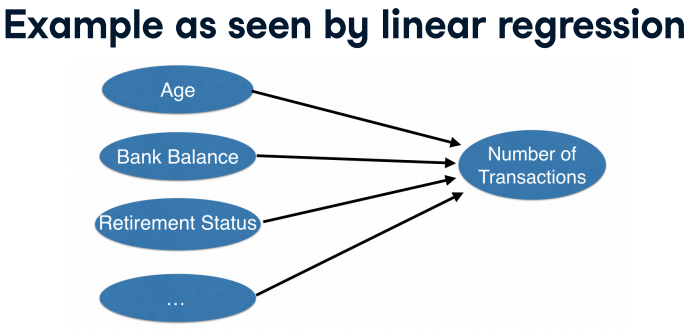

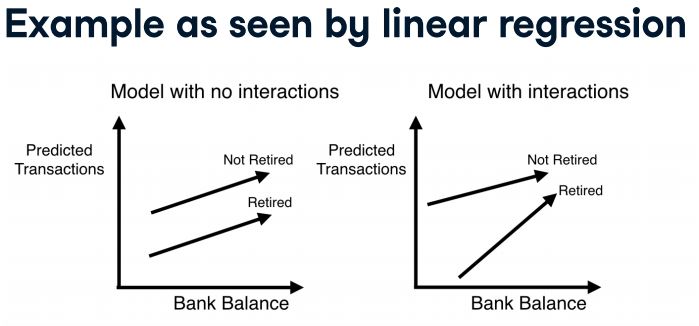

# Forward Propagation

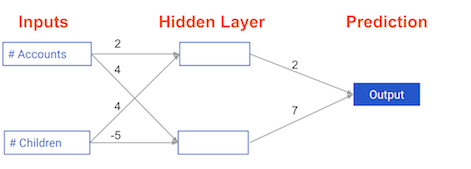

In [10]:
import numpy as np
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
input_data = np.array([3,5])

In [11]:
weights

{'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}

In [12]:
input_data

array([3, 5])

In [13]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


# The Rectified Linear Activation Function
An "activation function" is a function applied at each node. It converts the node's input into some output.This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.
Here are some examples:
relu(3) = 3, 
relu(-3) = 0

In [15]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


# Applying the network to many observations/rows of data

In [24]:
import numpy as np
input_data = [np.array([3, 5]),np.array([ 1, -1]),np.array([0, 0]),np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [25]:
# Define predict_with_network()
def predict_with_network1(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network1(input_data_row, weights))

# Print results
print(results)
        

[52, 63, 0, 148]


# Multi Layered network


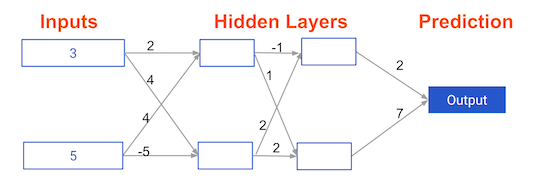

In [20]:
import numpy as np
input_data = np.array([3,5])
weights = {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (weights['node_0_0']* input_data).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (weights['node_0_1']* input_data).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (weights['node_1_0']* hidden_0_outputs).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (weights['node_1_1']* hidden_0_outputs).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (weights['output']* hidden_1_outputs).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


# Coding how weight changes affect accuracy

In [26]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network1(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2,1],
             'node_1': [1,0],
             'output': [1,1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network1(input_data,weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


# Scaling up to multiple points

In [30]:
import numpy as np
input_data = [np.array([0, 3]),np.array([1, 2]),np.array([-1, -2]),np.array([4, 0])]
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]),'node_1':np.array([1. , 1.5]),'output':np.array([1. , 1.5])}
target_actuals = [1,3,5,7]

from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network1(row,weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network1(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


# Calculating Slopes
When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (xb-y), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, 

In [34]:
import numpy as np
input_data = np.array([1,2,3])
weights = np.array([0,2,1])
target = 0

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


# Improving model weights

In [35]:

# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


# Making multiple updates to weights

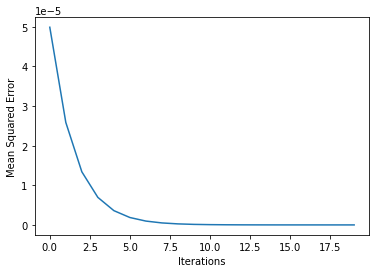

In [37]:
import matplotlib.pyplot as plt
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return(error)

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return(slope)

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return(mse)


n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()


In [2]:
! pip install keras


In [1]:
!pip install tensorflow

     |████████████████████████████████| 173.9 MB 323 kB/s eta 0:00:01   |█▋                              | 8.8 MB 368 kB/s eta 0:07:29     |███████████▌                    | 62.8 MB 280 kB/s eta 0:06:37     |████████████████████████▎       | 132.0 MB 1.4 MB/s eta 0:00:30     |█████████████████████████▌      | 138.8 MB 1.5 MB/s eta 0:00:24     |██████████████████████████▋     | 144.5 MB 1.3 MB/s eta 0:00:24     |██████████████████████████████▏ | 163.8 MB 539 kB/s eta 0:00:19
     |████████████████████████████████| 462 kB 211 kB/s eta 0:00:01
     |████████████████████████████████| 127 kB 342 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 27 kB/s eta 0:00:015
     |████████████████████████████████| 65 kB 220 kB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 185 kB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 27 kB/s eta 0:00:013    |█████████▎                      | 4.5 MB 394 kB/s eta 0:00:28
     |████████████████████████████████| 3.3 MB

# Specifying a model using keras


In [32]:
# Import necessary modules
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential

df = pd.read_csv('./data/hourly_wages.csv')
df_predictors = df.loc[:, df.columns != 'wage_per_hour']
predictors = df_predictors.values
target = df['wage_per_hour']

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation ='relu',input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32,activation='relu'))

# Add the output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam',loss = 'mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

# Fit the model
model.fit(predictors,target)


Loss function: mean_squared_error
17/17 [==============================] - 0s 1ms/step - loss: 95.7422


# Classification

In [4]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

df = pd.read_csv('./data/titanic_all_numeric.csv')
df['age_was_missing'] = df['age_was_missing'].replace([False,True],[0,1])
df_predictors = df.loc[:, df.columns != 'survived']
predictors = df_predictors.values
target = df['survived']
n_cols = df_predictors.shape[1]

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32,activation = 'relu',input_shape =(n_cols,)))

# Add the output layer
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(predictors,target)


28/28 [==============================] - 0s 1ms/step - loss: 5.6267 - accuracy: 0.5917


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________
